In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# 🔹 Step 1: Load Data from File

In [15]:
from utils import *
data = load_all_data(folder_path='../data')
data = data[1]
raw_measurements = data[1:, :3]  # Extract ax, ay, az

num_samples = raw_measurements.shape[0]  # Number of samples

# Assume Earth’s gravity acts on Z-axis in ideal conditions
g = 9.81  # Gravity magnitude [m/s²]

# 🔹 Step 2: Estimate Calibration Parameters

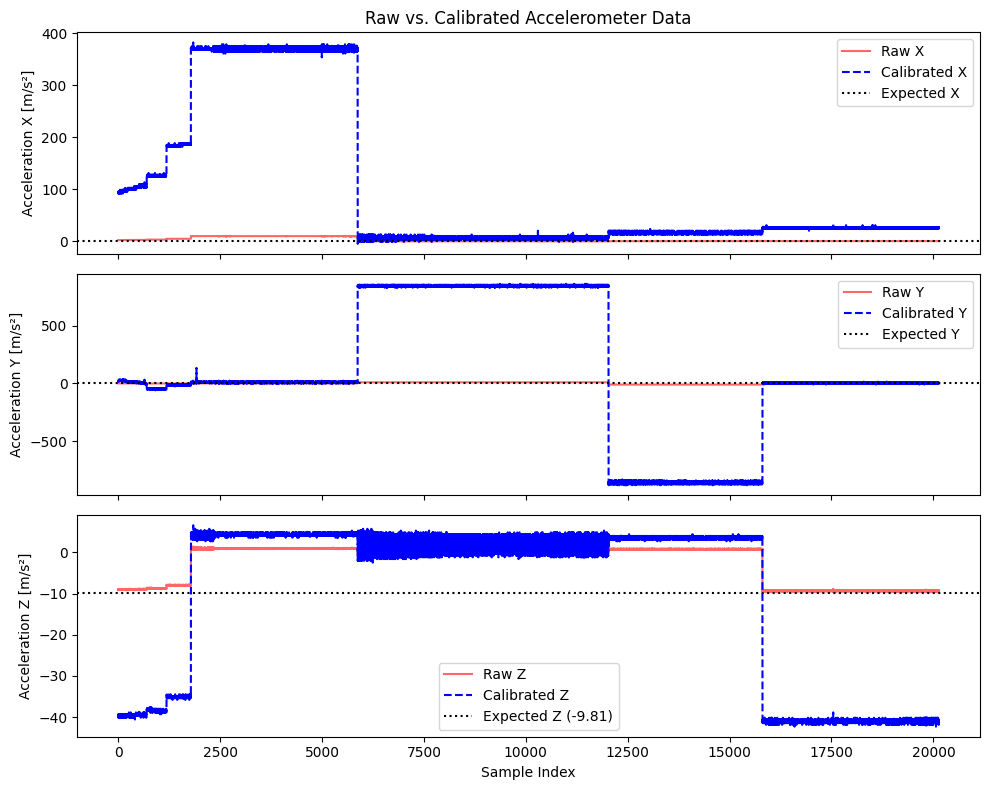

Estimated Scale Factors: [[0.02734515 0.         0.        ]
 [0.         0.0116022  0.        ]
 [0.         0.         0.22661092]]
Estimated Biases: [ 0.02734515  0.0116022  -0.02309999]


In [ ]:
def estimate_calibration_params(measurements):
    """
    Uses least squares to estimate scale factors and biases.
    Assumes the true force acting on the system is gravity.
    """
    # Construct the expected input force matrix (gravity in Z direction)
    U = np.ones((num_samples, 4))  # (ux, uy, uz, bias term)
    U[:, 2] = -g  # Only Z-component should be -9.81

    # Solve linear least squares: Ax = B → x = (A^T A)^(-1) A^T B
    params, _, _, _ = np.linalg.lstsq(U, measurements, rcond=None)

    # Extract calibration parameters
    estimated_scales = np.diag(params[:3])  # Scale factors
    estimated_biases = params[3]  # Bias offsets
    return estimated_scales, estimated_biases

estimated_scales, estimated_biases = estimate_calibration_params(raw_measurements)



# 🔹 Step 3: Apply Calibration to Data

In [ ]:
calibrated_measurements = (raw_measurements - estimated_biases) / estimated_scales

# 🔹 Step 4: Plot Raw vs. Calibrated Data

In [ ]:

fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axes[0].plot(raw_measurements[:, 0], label='Raw X', color='red', alpha=0.6)
axes[0].plot(calibrated_measurements[:, 0], label='Calibrated X', color='blue', linestyle='dashed')
axes[0].axhline(0, color='black', linestyle='dotted', label="Expected X")
axes[0].set_ylabel("Acceleration X [m/s²]")
axes[0].legend()
axes[0].set_title("Raw vs. Calibrated Accelerometer Data")

axes[1].plot(raw_measurements[:, 1], label='Raw Y', color='red', alpha=0.6)
axes[1].plot(calibrated_measurements[:, 1], label='Calibrated Y', color='blue', linestyle='dashed')
axes[1].axhline(0, color='black', linestyle='dotted', label="Expected Y")
axes[1].set_ylabel("Acceleration Y [m/s²]")
axes[1].legend()

axes[2].plot(raw_measurements[:, 2], label='Raw Z', color='red', alpha=0.6)
axes[2].plot(calibrated_measurements[:, 2], label='Calibrated Z', color='blue', linestyle='dashed')
axes[2].axhline(-g, color='black', linestyle='dotted', label="Expected Z (-9.81)")
axes[2].set_ylabel("Acceleration Z [m/s²]")
axes[2].set_xlabel("Sample Index")
axes[2].legend()

plt.tight_layout()
plt.show()


# 🔹 Step 5: Print Calibration Results


In [ ]:
print("Estimated Scale Factors:", np.diag(estimated_scales))
print("Estimated Biases:", estimated_biases)